In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

In [2]:
iris = sns.load_dataset('iris')

iris.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### 1) What does the distribution of petal lengths look like?

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


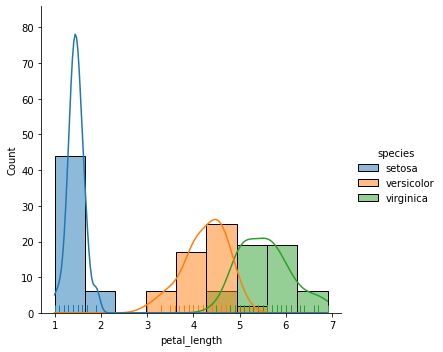

In [4]:
sns.displot(data = iris, x = 'petal_length', kde = True, rug= True, hue = 'species')

### 2) Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

In [5]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [6]:
labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

<AxesSubplot:>

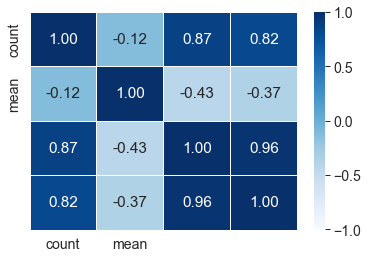

In [65]:
sns.heatmap(iris.corr(), annot = True, 
           fmt = '0.2f',
           cmap= 'Blues',
           center = 0,
           vmin = -1,#forcing map to be in two extreme values (-1,1)
           linewidth = 1,
           linecolor= 'white',
           xticklabels = labels, 
           yticklabels = labels)

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

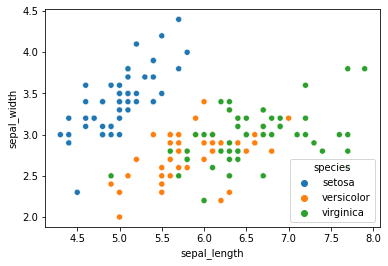

In [8]:
sns.scatterplot(data = iris, x = 'sepal_length', y= 'sepal_width', hue = 'species')

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

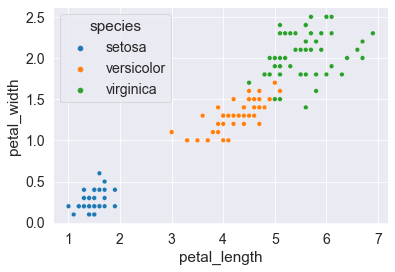

In [66]:
sns.scatterplot(data = iris, x = 'petal_length', y= 'petal_width', hue = 'species')

### 3) Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


#### ANSWER: not really. By using the barplot and catplot, most of the sepal dimensions overlap.. Petal width & length is a more accurate predictor of species.

In [9]:
#sns.displot(data = iris, x = 'sepal_length', kde = True, rug= True, hue = 'species')
#sns.displot(data = iris, x = 'sepal_width', kde = True, rug= True, hue = 'species')

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

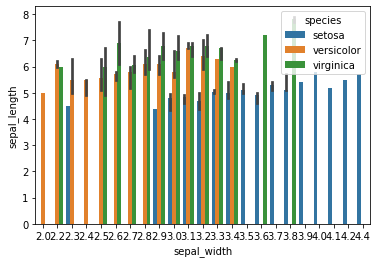

In [10]:
sns.barplot(data = iris, y = 'sepal_length', x = 'sepal_width', hue = 'species', estimator = np.median)

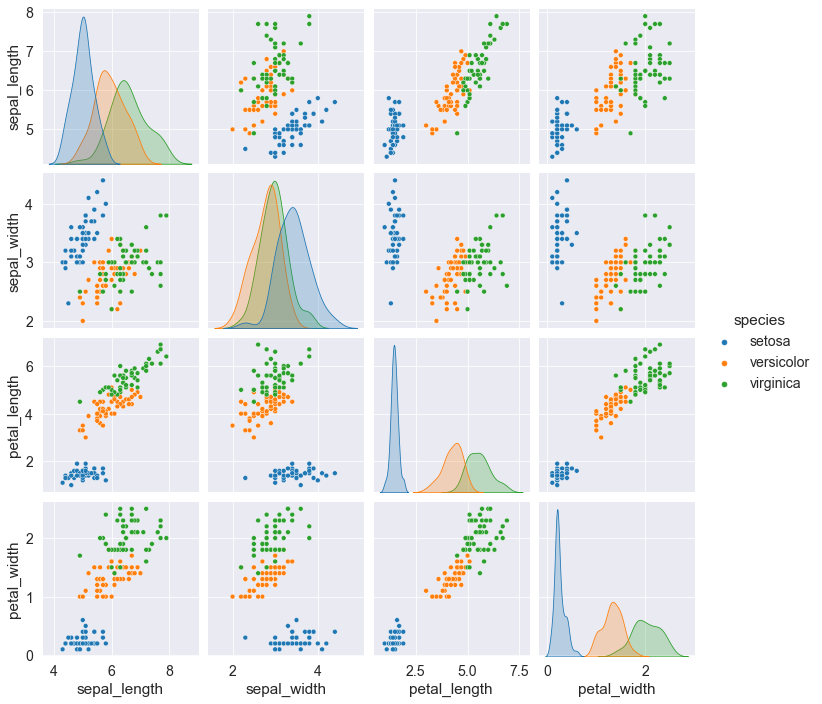

In [67]:
sns.pairplot(data=iris, hue='species')

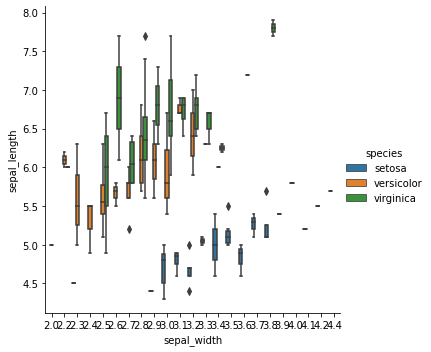

In [11]:
sns.catplot(data = iris, x= 'sepal_width', y = 'sepal_length', kind = 'box', hue = 'species')

### 4) Which features would be best used to predict species?

#### ANSWER: Petal dimensions seem to have more categorical relations than sepal dimensions. 

<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

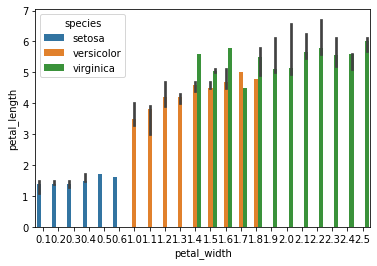

In [12]:
sns.barplot(data = iris, y = 'petal_length', x = 'petal_width', hue = 'species', estimator = np.median)

## SECTION II:
###  1) Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [13]:
anscombe = sns.load_dataset('anscombe')

In [14]:
#data('anscombe', show_doc = True)

In [15]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [71]:
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

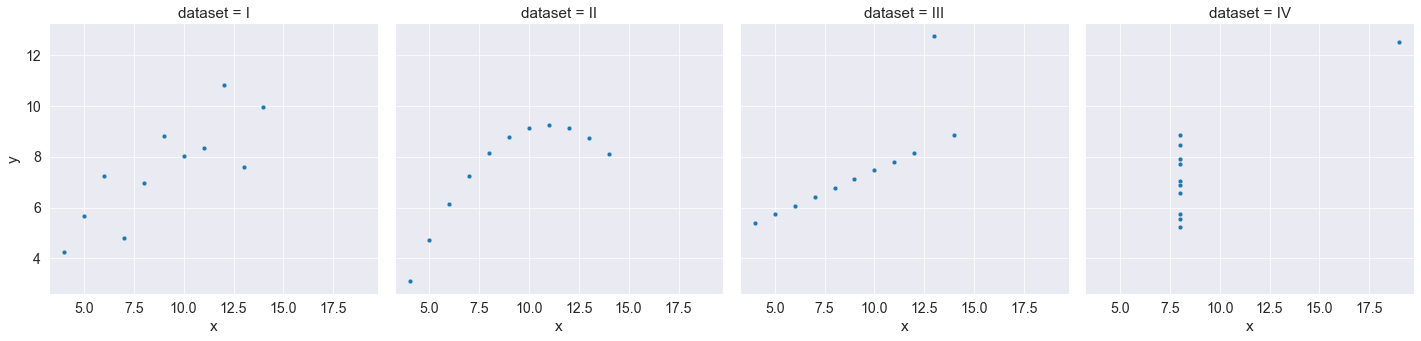

In [72]:
sns.relplot(data=anscombe, x= 'x',y='y',col='dataset')

In [17]:
anscombe.corr()
anscombe.corr()
labels = ['count', 'mean']

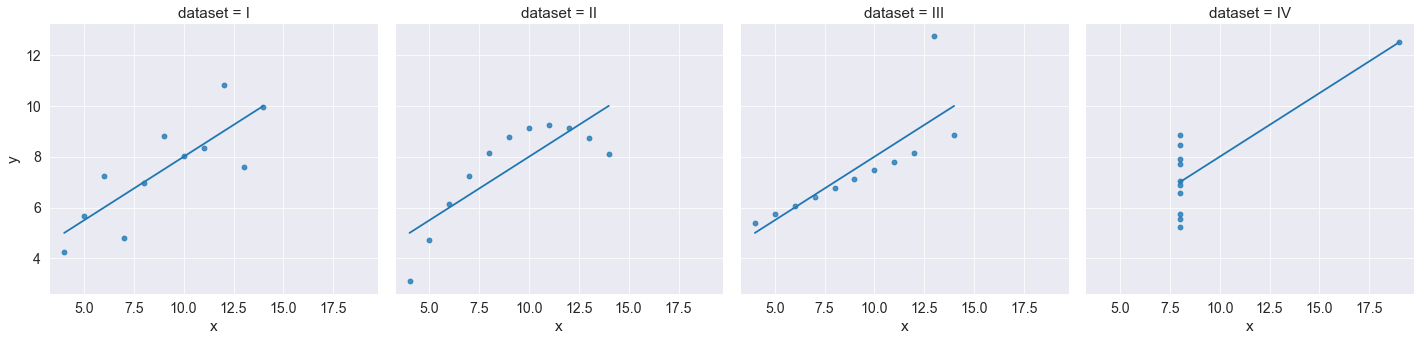

In [74]:
#outliers and it's impact
sns.lmplot(data=anscombe, x= 'x',y='y',col='dataset', ci = 0)
#dataset III shows a major outlier that affects the whole line (may need to assess whether to toss that point or not)
#dataset IV shows that one outlier could make the line regress farther out. Again, need to check that data point and the validity of its data. 

### 2) Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [81]:
insect_sprays = data('InsectSprays')

In [82]:
insect_sprays.dtypes

count     int64
spray    object
dtype: object

In [21]:
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

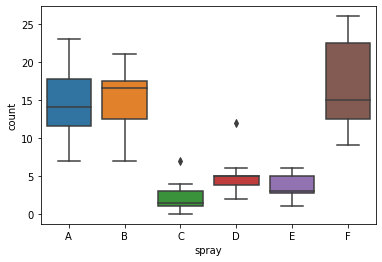

In [22]:
sns.boxplot(data = insect_sprays, x = 'spray', y = 'count')

### 3) Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [23]:
swiss = data('swiss')

In [24]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [25]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


### a) Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [33]:
swiss.Catholic.mean()

41.14382978723404

In [83]:
swiss['is_catholic']=swiss.Catholic >40.9

In [46]:
is_catholic

[Courtelary      False
 Delemont         True
 Franches-Mnt     True
 Moutier         False
 Neuveville      False
 Porrentruy       True
 Broye            True
 Glane            True
 Gruyere          True
 Sarine           True
 Veveyse          True
 Aigle           False
 Aubonne         False
 Avenches        False
 Cossonay        False
 Echallens       False
 Grandson        False
 Lausanne        False
 La Vallee       False
 Lavaux          False
 Morges          False
 Moudon          False
 Nyone           False
 Orbe            False
 Oron            False
 Payerne         False
 Paysd'enhaut    False
 Rolle           False
 Vevey           False
 Yverdon         False
 Conthey          True
 Entremont        True
 Herens           True
 Martigwy         True
 Monthey          True
 St Maurice       True
 Sierre           True
 Sion             True
 Boudry          False
 La Chauxdfnd    False
 Le Locle        False
 Neuchatel       False
 Val de Ruz      False
 ValdeTrave

### b) Does whether or not a province is Catholic influence fertility?

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

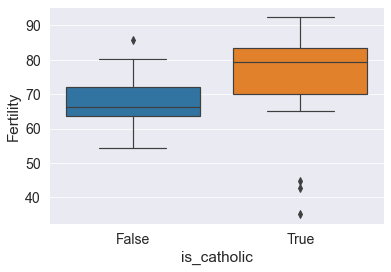

In [84]:
sns.boxplot( x='is_catholic', y='Fertility', data=swiss)

In [86]:
swiss.groupby('is_catholic').Fertility.mean()

is_catholic
False    67.335714
True     74.278947
Name: Fertility, dtype: float64

<Figure size 576x288 with 0 Axes>

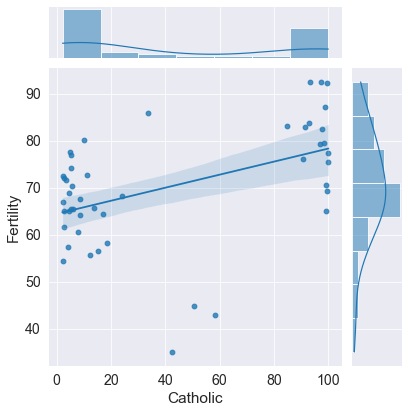

In [47]:
sns.set_style('darkgrid') #can use whitegrid, whites, darks, ticks, etc...

plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1.6) #besides paper you can use talk and poster

sns.jointplot(x='Catholic', y='Fertility', data=swiss, kind='reg')

sns.despine(left=True) #takes off spine on side you set

### c) What measure correlates most strongly with fertility?

In [89]:
#sns.pairplot(data=swiss.iloc[:,:-1]) #used this to look over comparisons
#or to see the values:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.275720
Name: Fertility, dtype: float64

<Figure size 576x288 with 0 Axes>

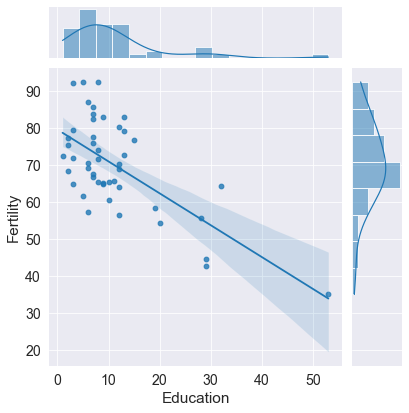

In [50]:
sns.set_style('darkgrid') #can use whitegrid, whites, darks, ticks, etc...

plt.figure(figsize=(8,4))

sns.set_context('paper', font_scale=1.6) #besides paper you can use talk and poster

sns.jointplot(x='Education', y='Fertility', data=swiss, kind='reg')

sns.despine(left=True) #takes off spine on side you set

In [51]:
# For me, it looks like Education and Fertility has a closer comparison than being Catholic

## 4) Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [57]:
chipotle=data('Chipotle')

Did you mean:
Chile, Chirot, Cowles, hirose, cities, Hitters, shuttle, pottery, Pottery, alcohol, coleman


In [2]:
def get_db_url(db):
    from env import user, password, host
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [3]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [5]:
# Convert the item_price column into a float
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

/var/folders/d3/11nygz6126ndxvtrp12687680000gn/T/ipykernel_41231/929225920.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


In [6]:
orders.head(6)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
1,2,1,1,Izze,[Clementine],3.39
2,3,1,1,Nantucket Nectar,[Apple],3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98


In [7]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [9]:
best_sellers.index

Index(['Chicken Bowl', 'Chicken Burrito', 'Chips and Guacamole',
       'Steak Burrito'],
      dtype='object', name='item_name')

In [10]:
orders[orders.item_name.isin(best_sellers.index)]

,id,order_id,quantity,item_name,choice_description,item_price
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",10.98
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",11.75
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",9.25
10,11,5,1,Chips and Guacamole,nan,4.45
...,...,...,...,...,...,...
4607,4608,1829,1,Steak Burrito,"[Tomatillo Green Chili Salsa, [Rice, Cheese, Sour Cream, Guacamole]]",11.75
4610,4611,1830,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75
4616,4617,1832,1,Chips and Guacamole,nan,4.45
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",11.75


In [11]:
# revenue produced by 4 highest selling items.

revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [12]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0, 'Gross Revenue')

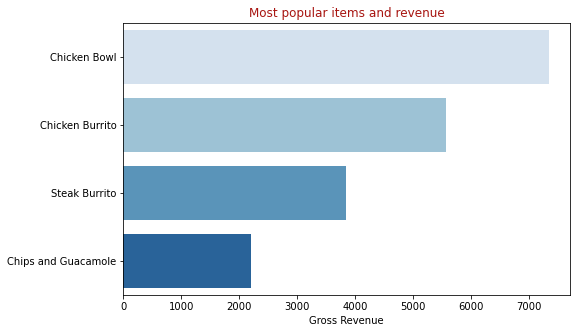

In [14]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name',
            x = 'item_price',
            data = revenue,
            palette=('Blues'))


plt.title('Most popular items and revenue', fontdict={'color': '#a81612'})

plt.ylabel("") # to remove the column_name
plt.xlabel("Gross Revenue")

## 5) Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [96]:
sleepstudy=data('sleepstudy')
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [97]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [106]:
sleepstudy['Subject'] ='Subject_'+ sleepstudy.Subject.astype(str) #changing Subject to a string, where we can then collect and hue each Subject rather than a unique int.

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

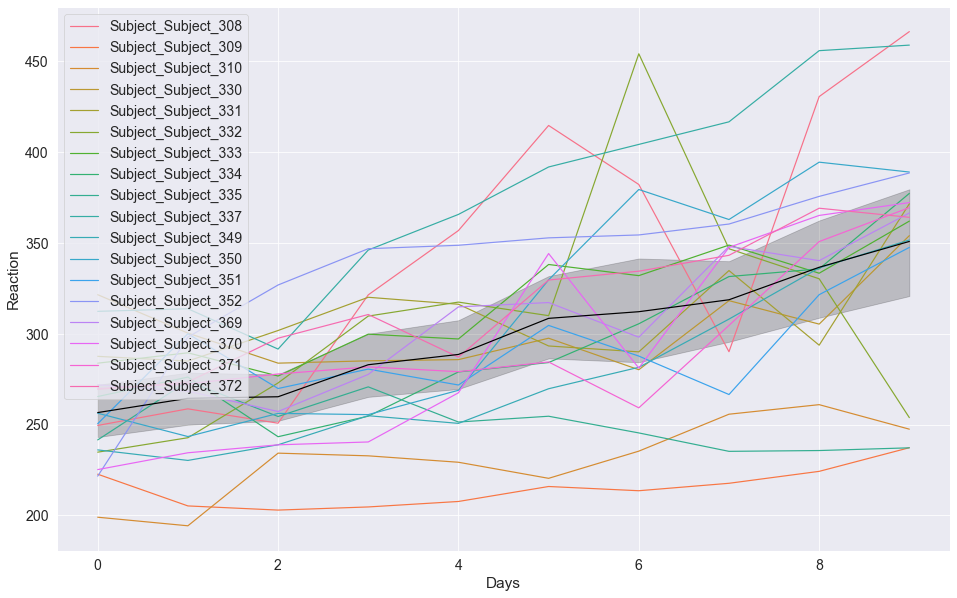

In [111]:
plt.figure(figsize=(16,10))

sns.lineplot(data=sleepstudy, x='Days',y='Reaction', hue='Subject')
sns.lineplot(data=sleepstudy, x='Days',y='Reaction', color='black') #this is showing the mean of the data